In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [2]:
try:
    connection = mysql.connector.connect(host='localhost',
                                        database='meclass',user='root',
                                        password='root123')
    sql_select_query = 'select * from meclass.usr_login;'
    cursor = connection.cursor()
    cursor.execute(sql_select_query)
    records = cursor.fetchall()
    
except Error as e:
    print("Error reading data from MySQL table", e)


In [4]:
rec = pd.DataFrame(records)

rec.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,@sysUser,sysUser,None,0,系统,7e2854f81125495ab6f4075d77f245ab            ,1,1,2015-10-29 21:53:43,1,1,None,,,0,510100,2017-05-09 14:49:41,0
1,298,@可复用4,lxd,None,0,客服,3866f1450b29377130da0dcb918d7839,1,3,2017-01-23 11:00:53,1,1,None,,,0,0,2018-03-23 16:49:12,0
2,301,@admin,admin,None,0,超级管理员,35111fa9b431401ba45dcfa0b92727e9,1,2,2015-10-29 21:53:43,1,1,None,,,0,510100,2019-03-18 21:17:19,1
3,303,@s,s,None,0,客服,$6$ArGHYbaK$hz0ZZcUEboIaKM8BrVCRm1p/03TIGowaQL...,1,3,2015-10-29 21:53:43,1,1,None,,,0,510100,2018-11-28 10:51:47,0
4,304,15136048@qq.com,梅林,18980757618,0,None,$6$XQklLKoe$7rCaBEFHA.rpCoC6MXtwHPT0llR2TEG9fH...,0,10,2016-11-19 00:00:00,1,1,1975-01-01,,,1,510100,2019-03-27 15:03:25,1


In [5]:
# rename all columns' name
titles = ['id','login_name','nickname','mobil_phone','is_phone_public',
         'name','password','is_verified','type','reg_time','flag','is_male',
         'birth_date','qq_number','email','has_figure','city_id',
         'login_time','ext_type']

rec.columns=titles

rec.head()

,id,login_name,nickname,mobil_phone,is_phone_public,name,password,is_verified,type,reg_time,flag,is_male,birth_date,qq_number,email,has_figure,city_id,login_time,ext_type
0,1,@sysUser,sysUser,None,0,系统,7e2854f81125495ab6f4075d77f245ab            ,1,1,2015-10-29 21:53:43,1,1,None,,,0,510100,2017-05-09 14:49:41,0
1,298,@可复用4,lxd,None,0,客服,3866f1450b29377130da0dcb918d7839,1,3,2017-01-23 11:00:53,1,1,None,,,0,0,2018-03-23 16:49:12,0
2,301,@admin,admin,None,0,超级管理员,35111fa9b431401ba45dcfa0b92727e9,1,2,2015-10-29 21:53:43,1,1,None,,,0,510100,2019-03-18 21:17:19,1
3,303,@s,s,None,0,客服,$6$ArGHYbaK$hz0ZZcUEboIaKM8BrVCRm1p/03TIGowaQL...,1,3,2015-10-29 21:53:43,1,1,None,,,0,510100,2018-11-28 10:51:47,0
4,304,15136048@qq.com,梅林,18980757618,0,None,$6$XQklLKoe$7rCaBEFHA.rpCoC6MXtwHPT0llR2TEG9fH...,0,10,2016-11-19 00:00:00,1,1,1975-01-01,,,1,510100,2019-03-27 15:03:25,1


In [6]:
rec.birth_date.isnull().sum()

52264

In [7]:
# making time related data more accessable. 
def date_info(dataset,col_str):
    dataset[col_str]=pd.to_datetime(dataset[col_str])
    dataset['year']=dataset[col_str].dt.year
    dataset['month']=dataset[col_str].dt.month
    #dataset['day_of_week']=dataset[col_str].dt.weekday_name
    #dataset['hour']=dataset[col_str].dt.hour
    dataset['year_month']=[str(i)+'_'+str(j) for i,j in zip(dataset['year'], dataset['month'])]


In [8]:
date_info(rec,"birth_date")

user_birth_year = rec.year

user_birth_year.dropna(inplace=True)

user_birth_year.head()

4    1975.0
5    1984.0
6    1993.0
7    1991.0
8    1991.0
Name: year, dtype: float64

In [9]:
import matplotlib.pyplot as plt

In [10]:
user_birth_year = user_birth_year.value_counts()

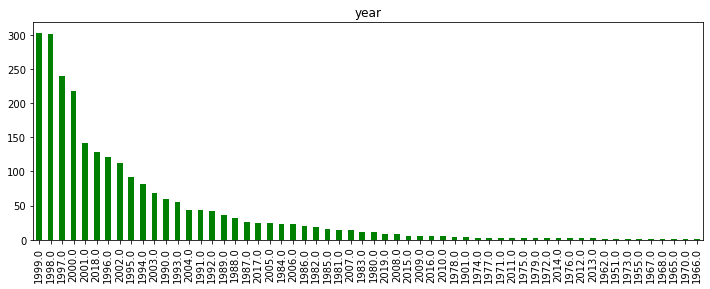

In [11]:
user_birth_year.plot(kind='bar',subplots=True, figsize=(12,4), color='g',sort_columns=False,legend=False);

In [ ]:
# Reminder: majority of our users are high school and uni students who were born after 1990.